![nn](./image/KakaoTalk_20211220_162021535.png)

이런식으로 무언가를 결정 할 수 있는 트리구조의 알고리즘을 결정트리 알고리즘이라고 한다.

![nn](./image/KakaoTalk_20211220_162343822.png)

트리의 구조는 위와 같으며 노드의 이름이 각각 주어져있다.

![nn](./image/KakaoTalk_20211220_162351899.png)

학습은 불순도를 통해 노드를 나누며 gini와 entropy를 기준으로 삼는다. 
불순도를 계산해서 IG(Information gain)이라는 것이 큰 Feature를 나누는 기준으로 선택하면 된다.
*IG = 부모노드 - 자식노드

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data') # pandas에 read_csv를 호출하여 해당 주소에 있는 데이터를 가져옴
print(wine.info(), wine.head()) # 데이터를 확인하기 위해 info()함수를 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None    alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0


In [2]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


위는 데이터 탐색 과정이며 데이터를 가지고 오면 확인부터 해야한다.
class는 25% ~ 75%가 1로 나오는 것을 보면 확인이 필요한 데이터인 것을 알 수 있다.

In [3]:
wine['class'].unique() 

array([0., 1.])

유니크한 값이 2가지 0과 1이 들어가있는 범주형 변수다. 그럼 회귀 모델보단 분류 모델에 더 적합한 데이터다.

In [4]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2) # train과 test 데이터를 8 : 2의 비율로 나눈다.

In [6]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

decision_tree = DecisionTreeClassifier(criterion = 'entropy') #  criterion은 gini, entropy 둘중 하나를 선택 할 수 있다. default값은 gini이다.
decision_tree.fit(train_input, train_target) # 불러온 모델에 train데이터를 적합시킨다.

print('학습데이터 성능 :',decision_tree.score(train_input,train_target))
print('테스트데이터 성능 :',decision_tree.score(test_input,test_target))

학습데이터 성능 : 0.9974985568597268
테스트데이터 성능 : 0.8607692307692307


학습 데이터의 성능은 높았다. 하지만 테스트 데이터에 대해서는 약 88% 정도의 정확도가 나오고 있다.

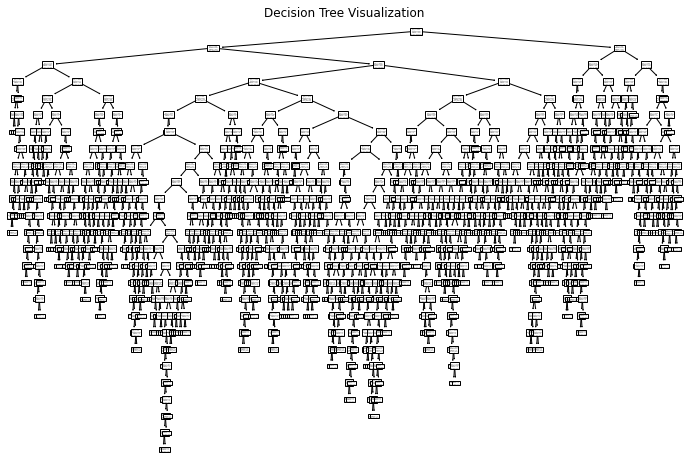

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (12,8)) # figure를 생성하는데 가로 12, 세로 8 크기로 설정

plot_tree(decision_tree) # plot_tree안에 모델을 넣어주면 된다
plt.title('Decision Tree Visualization')
plt.show()

In [9]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3) # max_depth는 트리의 깊이를 3으로 제한 한다는 뜻이다.
decision_tree.fit(train_input, train_target)

print('학습데이터 성능 :',decision_tree.score(train_input,train_target))
print('테스트데이터 성능 :',decision_tree.score(test_input,test_target))

학습데이터 성능 : 0.8452953627092553
테스트데이터 성능 : 0.8423076923076923


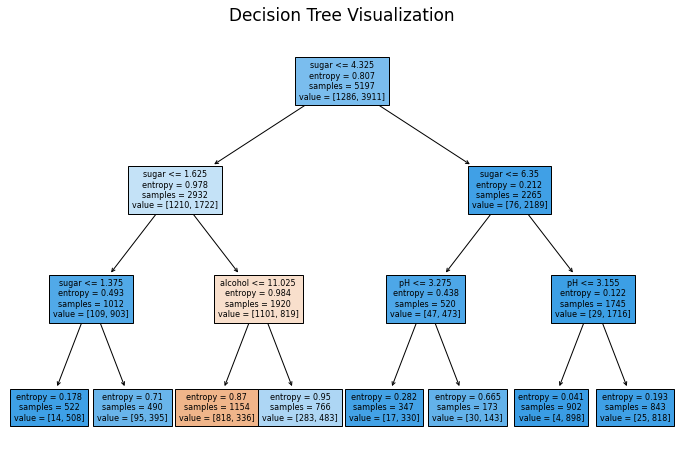

In [10]:
plt.figure(figsize = (12,8)) # figure를 설정하는데 가로 12, 세로 8 크기의 figure를 생성

plot_tree(decision_tree, 
          filled = True, 
          feature_names = ['alcohol', 'sugar', 'pH'], 
          fontsize = 8)
plt.title('Decision Tree Visualization', fontsize = 17)
plt.show()

In [12]:
print(decision_tree.feature_importances_)

[0.09808015 0.88447192 0.01744793]


updated